In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#getting the train and test data
train_df =pd.read_csv('train.csv')
test_df =pd.read_csv('test.csv')
train_df.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [3]:
test_df.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [4]:
#checking the class to know if balance or imbalance
train_df.Promoted_or_Not.value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [5]:
train_df.shape

(38312, 19)

In [6]:
test_df.shape

(16496, 18)

In [7]:
#Getting insight into the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [8]:
#Getting total number of null values in each column
train_df.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [9]:
#Description of the object datatype
train_df.describe(include=['O'])

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
count,38312,38312,36633,38312,38312,38312,38312,38312,38312,38312,38312
unique,38312,9,3,2,3,37,2,3,2,2,7
top,YAK/S/15894,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,LAGOS,Yes,Married,No,No,1
freq,1,11695,25578,26880,21310,6204,34995,31022,38161,34709,18867


In [10]:
#Description of the numerical features
train_df.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


# Data Visualization 

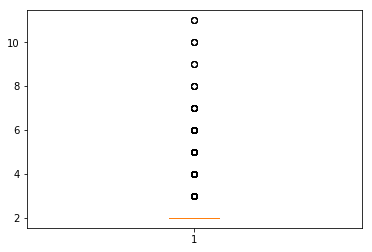

In [11]:
plt.boxplot(train_df['Trainings_Attended'])
plt.show()

In [12]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, hold=None, data=None)
    Make a box and whisker plot.
    
    Make a box and whisker plot for each column of ``x`` or each
    vector in sequence ``x``.  The box extends from the lower to
    upper quartile values of the data, with a line at the median.
    The whiskers extend from the box to show the range of the
    data.  Flier points are those past the end of the whiskers.
    
    Parameters
    ----------
    x : Array or a sequence of vectors.
        The input data.
    
    notch : bool, optional (False)
        If `True`, will pr

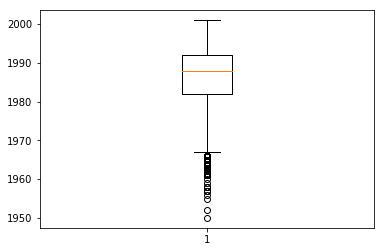

In [13]:
plt.boxplot(train_df['Year_of_birth'])
plt.show()

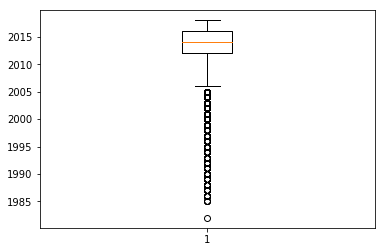

In [14]:
plt.boxplot(train_df['Year_of_recruitment'])
plt.show()

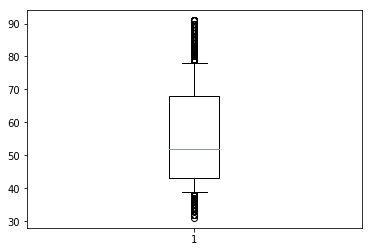

In [15]:
plt.boxplot(train_df['Training_score_average'],whis=(5,95),showfliers=True)
plt.show()

In [16]:
train_df[['Trainings_Attended','Promoted_or_Not']].groupby(['Trainings_Attended'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Trainings_Attended,Promoted_or_Not
0,2,0.087699
2,4,0.073955
1,3,0.072989
5,7,0.071429
3,5,0.053797
4,6,0.021505
6,8,0.000000
7,9,0.000000
8,10,0.000000
9,11,0.000000


In [17]:
train_df[['Year_of_birth','Promoted_or_Not']].groupby(['Year_of_birth'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Year_of_birth,Promoted_or_Not
1,1952,1.000000
3,1956,1.000000
33,1986,0.101488
29,1982,0.097908
40,1993,0.097880
35,1988,0.094797
30,1983,0.093890
38,1991,0.092374
34,1987,0.091794
41,1994,0.090176


In [18]:
train_df[['Year_of_recruitment','Promoted_or_Not']].groupby(['Year_of_recruitment'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Year_of_recruitment,Promoted_or_Not
3,1987,0.250000
1,1985,0.250000
13,1997,0.131579
12,1996,0.108696
24,2008,0.098546
7,1991,0.095238
27,2011,0.092491
32,2016,0.091741
33,2017,0.091495
25,2009,0.087508


In [19]:
train_df[['Training_score_average','Promoted_or_Not']].groupby(['Training_score_average'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Training_score_average,Promoted_or_Not
60,91,1.000000
59,90,1.000000
58,89,1.000000
56,87,1.000000
57,88,0.966667
55,86,0.962963
54,85,0.903846
53,84,0.819444
52,83,0.592593
51,82,0.422222


In [20]:
train_df[['Last_performance_score','Promoted_or_Not']].groupby(['Last_performance_score'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Last_performance_score,Promoted_or_Not
5,12.5,0.158164
0,0.0,0.084682
4,10.0,0.081506
3,7.5,0.071885
2,5.0,0.046875
1,2.5,0.013642


In [21]:
train_df[['Channel_of_Recruitment','Promoted_or_Not']].groupby(['Channel_of_Recruitment'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Channel_of_Recruitment,Promoted_or_Not
2,Referral and Special candidates,0.121287
0,Agency and others,0.084280
1,Direct Internal process,0.083179


In [22]:
train_df[['Targets_met','Promoted_or_Not']].groupby(['Targets_met'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Targets_met,Promoted_or_Not
1,1,0.169181
0,0,0.038446


In [23]:
train_df[['Previous_Award','Promoted_or_Not']].groupby(['Previous_Award'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Previous_Award,Promoted_or_Not
1,1,0.448703
0,0,0.075965


In [24]:
train_df[['Foreign_schooled','Promoted_or_Not']].groupby(['Foreign_schooled'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Foreign_schooled,Promoted_or_Not
1,Yes,0.084869
0,No,0.081700


In [25]:
train_df[['Marital_Status','Promoted_or_Not']].groupby(['Marital_Status'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Marital_Status,Promoted_or_Not
1,Not_Sure,0.107438
0,Married,0.084972
2,Single,0.081709


In [26]:
train_df[['Past_Disciplinary_Action','Promoted_or_Not']].groupby(['Past_Disciplinary_Action'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Past_Disciplinary_Action,Promoted_or_Not
1,Yes,0.10596
0,No,0.08451


In [27]:
train_df[['Previous_IntraDepartmental_Movement','Promoted_or_Not']].groupby(['Previous_IntraDepartmental_Movement'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Previous_IntraDepartmental_Movement,Promoted_or_Not
0,No,0.085338
1,Yes,0.077435


In [28]:
train_df[['Gender','Promoted_or_Not']].groupby(['Gender'],as_index=False).mean().sort_values(by='Promoted_or_Not',ascending=False)

,Gender,Promoted_or_Not
0,Female,0.089048
1,Male,0.082701


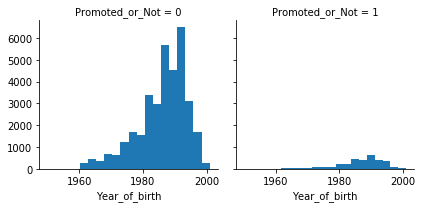

In [29]:
g = sns.FacetGrid(train_df, col='Promoted_or_Not')
g.map(plt.hist, 'Year_of_birth', bins=20)

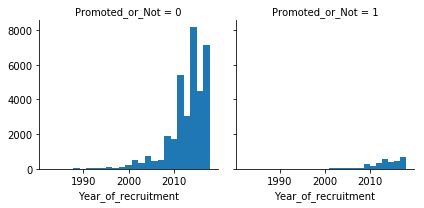

In [30]:
g = sns.FacetGrid(train_df, col='Promoted_or_Not')
g.map(plt.hist, 'Year_of_recruitment', bins=25)

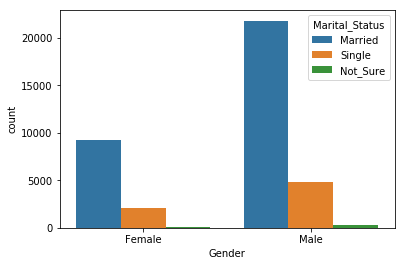

In [31]:
 sns.countplot('Gender',data=train_df,hue='Marital_Status')

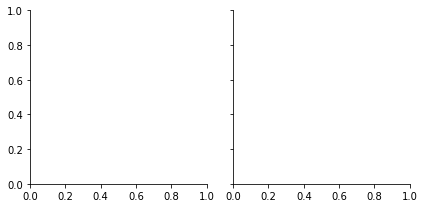

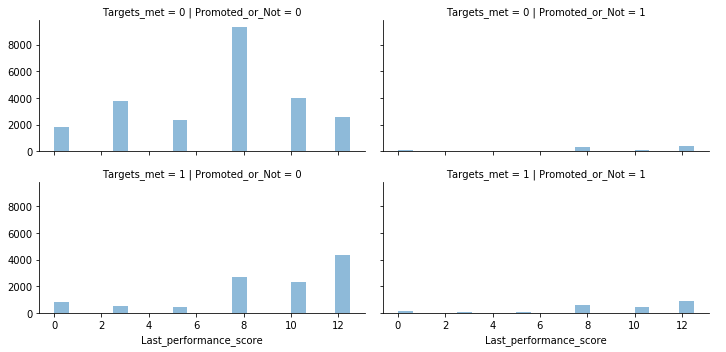

In [32]:
grid = sns.FacetGrid(train_df, col='Targets_met', hue='Promoted_or_Not')
grid = sns.FacetGrid(train_df, col='Promoted_or_Not', row='Targets_met', size=2.5, aspect=2.0)
grid.map(plt.hist, 'Last_performance_score', alpha=0.5, bins=20)
grid.add_legend();


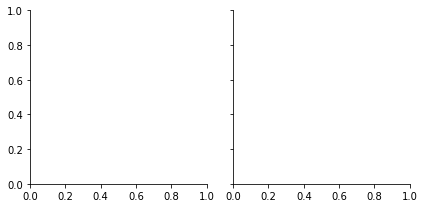

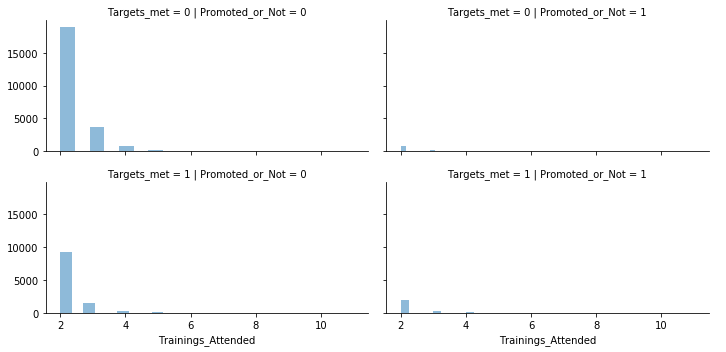

In [33]:
grid = sns.FacetGrid(train_df, col='Targets_met', hue='Promoted_or_Not')
grid = sns.FacetGrid(train_df, col='Promoted_or_Not', row='Targets_met', size=2.5, aspect=2.0)
grid.map(plt.hist, 'Trainings_Attended', alpha=0.5, bins=20)
grid.add_legend();


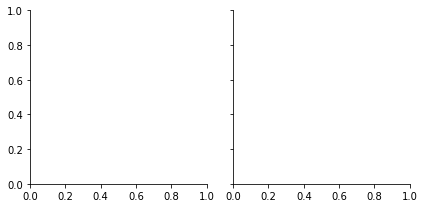

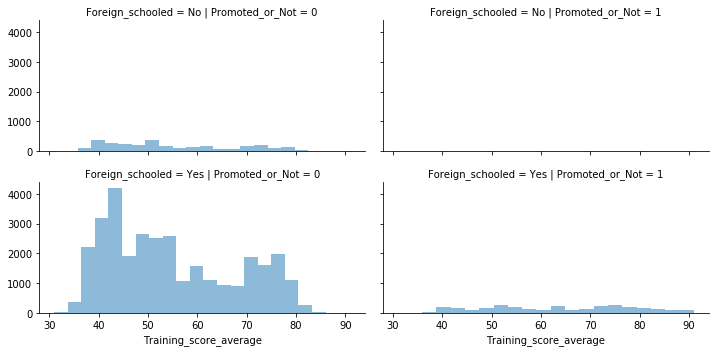

In [34]:
grid = sns.FacetGrid(train_df, col='Foreign_schooled', hue='Promoted_or_Not')
grid = sns.FacetGrid(train_df, col='Promoted_or_Not', row='Foreign_schooled', size=2.5, aspect=2.0)
grid.map(plt.hist, 'Training_score_average', alpha=0.5, bins=20)
grid.add_legend();

# PREPROCESSING

In [35]:
#Getting the Qualification with highest frequency
print(train_df['Qualification'].mode())
print(test_df['Qualification'].mode())

0    First Degree or HND
dtype: object
0    First Degree or HND
dtype: object


In [36]:
#Filling the NaN values in Qualification with the mode 
train_df['Qualification']=train_df['Qualification'].fillna('First Degree or HND')
test_df['Qualification']=test_df['Qualification'].fillna('First Degree or HND')

In [37]:
train_df['Qualification'].isnull().any()

False

In [38]:
Qualification=train_df['Qualification'].value_counts()
Qualification

First Degree or HND         27257
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

In [39]:
#Qualification as a Ordinal feature containing string to be label-encoded
train_df['Qualification'][train_df['Qualification']=='MSc, MBA and PhD']=1
train_df['Qualification'][train_df['Qualification']=='First Degree or HND']=2
train_df['Qualification'][train_df['Qualification']=='Non-University Education']=3
test_df['Qualification'][test_df['Qualification']=='MSc, MBA and PhD']=1
test_df['Qualification'][test_df['Qualification']=='First Degree or HND']=2
test_df['Qualification'][test_df['Qualification']=='Non-University Education']=3

In [40]:
np.unique(train_df['Qualification'])

array([1, 2, 3], dtype=object)

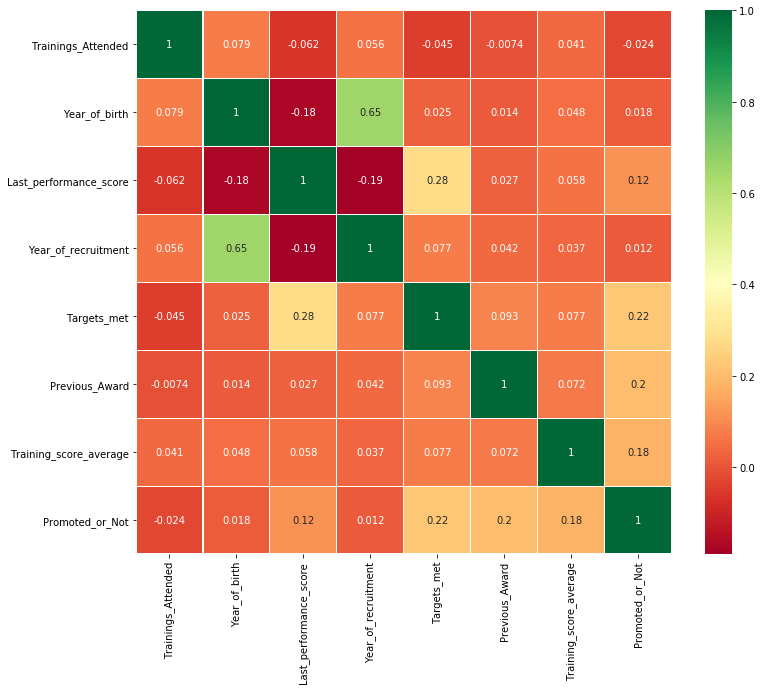

In [41]:
#Correlation betweeen features
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

In [42]:
#using get_dummies on Division
train_df=pd.get_dummies(train_df, columns=['Division'])
test_df=pd.get_dummies(test_df, columns=['Division'])

In [43]:
train_df.head()

,EmployeeNo,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,...,Promoted_or_Not,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing
0,YAK/S/00001,1,Female,Direct Internal process,2,1986,12.5,2011,1,0,...,0,0,1,0,0,0,0,0,0,0
1,YAK/S/00002,2,Male,Agency and others,2,1991,12.5,2015,0,0,...,0,0,0,1,0,0,0,0,0,0
2,YAK/S/00003,2,Male,Direct Internal process,2,1987,7.5,2012,0,0,...,0,0,1,0,0,0,0,0,0,0
3,YAK/S/00004,2,Male,Agency and others,3,1982,2.5,2009,0,0,...,0,0,1,0,0,0,0,0,0,0
4,YAK/S/00006,2,Male,Direct Internal process,3,1990,7.5,2012,0,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
#Dropping features not needed for analysis
train_df=train_df.drop(['EmployeeNo','State_Of_Origin'], axis=1)
test_df=test_df.drop(['EmployeeNo','State_Of_Origin'], axis=1)

In [45]:
#Coverting String values to numbers 
train_df['Gender']=train_df['Gender'].map({'Female':0, 'Male':1})
train_df['Foreign_schooled']=train_df['Foreign_schooled'].map({'Yes':1, 'No':0})
train_df['Past_Disciplinary_Action']=train_df['Past_Disciplinary_Action'].map({'Yes':1, 'No':0})
train_df['Previous_IntraDepartmental_Movement']=train_df['Previous_IntraDepartmental_Movement'].map({'Yes':1, 'No':0})

test_df['Gender']=test_df['Gender'].map({'Female':0, 'Male':1})
test_df['Foreign_schooled']=test_df['Foreign_schooled'].map({'Yes':1, 'No':0})
test_df['Past_Disciplinary_Action']=test_df['Past_Disciplinary_Action'].map({'Yes':1, 'No':0})
test_df['Previous_IntraDepartmental_Movement']=test_df['Previous_IntraDepartmental_Movement'].map({'Yes':1, 'No':0})

In [46]:
#One-hot encode Channel of recruitment
train_df=pd.get_dummies(train_df,columns=['Channel_of_Recruitment'])
test_df=pd.get_dummies(test_df,columns=['Channel_of_Recruitment'])

In [47]:
#Assigning numbers to String values of Marital_Status
train_df['Marital_Status']=train_df['Marital_Status'].map({'Married':1, 'Single':0,'Not_Sure':0})
test_df['Marital_Status']=test_df['Marital_Status'].map({'Married':1, 'Single':0,'Not_Sure':0})

In [48]:
train_df['No_of_previous_employers'].dtypes

dtype('O')

In [49]:
np.unique(train_df['No_of_previous_employers'])

array(['0', '1', '2', '3', '4', '5', 'More than 5'], dtype=object)

In [50]:
categorical_features = train_df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['Qualification', 'No_of_previous_employers'], dtype='object')

In [51]:
train_df=pd.get_dummies(train_df,columns=['No_of_previous_employers'])
test_df=pd.get_dummies(test_df,columns=['No_of_previous_employers'])

# Feature engineering 

In [52]:
#Deriving a new feature from Year of birth
train_df['Age']=2018-train_df['Year_of_birth']
test_df['Age']=2018-test_df['Year_of_birth']

In [53]:
Age=train_df['Age'].value_counts()
Age

27    2544
28    2506
29    2441
26    2380
30    2268
25    2217
31    2157
24    1985
32    1882
33    1766
34    1505
23    1416
35    1342
36    1195
37    1162
22     910
38     893
39     797
40     685
41     600
21     596
42     551
43     508
45     397
44     394
47     353
46     312
20     305
48     256
49     249
50     233
52     207
51     195
53     178
54     168
19     167
55     161
57     147
56     134
17      71
18      66
61       4
60       3
58       1
68       1
59       1
66       1
62       1
63       1
Name: Age, dtype: int64

In [54]:
#Deriving new feature from Year_of_recruitment
train_df['Years_of_service']=2018-train_df['Year_of_recruitment']
test_df['Years_of_service']=2018-test_df['Year_of_recruitment']

In [55]:
train_df.head()

,Qualification,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,...,Channel_of_Recruitment_Referral and Special candidates,No_of_previous_employers_0,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5,Age,Years_of_service
0,1,0,2,1986,12.5,2011,1,0,41,0,...,0,1,0,0,0,0,0,0,32,7
1,2,1,2,1991,12.5,2015,0,0,52,1,...,0,1,0,0,0,0,0,0,27,3
2,2,1,2,1987,7.5,2012,0,0,42,1,...,0,1,0,0,0,0,0,0,31,6
3,2,1,3,1982,2.5,2009,0,0,42,1,...,0,0,1,0,0,0,0,0,36,9
4,2,1,3,1990,7.5,2012,0,0,77,1,...,0,0,1,0,0,0,0,0,28,6


In [56]:
#Year of birth,Year of recruitment are not needed again since new features are already derived from them,so are dropped
train_df=train_df.drop(['Year_of_birth','Year_of_recruitment'], axis=1)
test_df=test_df.drop(['Year_of_birth','Year_of_recruitment'], axis=1)

In [57]:
train_df.shape

(38312, 33)

In [58]:
test_df.shape

(16496, 32)

# Training the model

In [59]:
y=train_df['Promoted_or_Not']
x=train_df.drop(['Promoted_or_Not'],axis=1)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test=train_test_split(x, y,stratify=y, train_size=0.75, random_state=42)

In [62]:
x_train.shape, y_train.shape

((28734, 32), (28734,))

In [63]:
#How many are promoted in the y_train
y_train.value_counts()

0    26303
1     2431
Name: Promoted_or_Not, dtype: int64

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
y_pred=log_reg.predict(x_test)
y_pred.shape

(9578,)

In [67]:
score=cross_val_score(log_reg, x, y, cv=10, scoring='accuracy')
score.mean()

0.9317966432408442

In [68]:
accuracy_score(y_pred, y_test)

0.9311964919607434

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96      9367
          1       0.22      0.86      0.35       211

avg / total       0.98      0.93      0.95      9578



In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_pred, y_test)

array([[8738,  629],
       [  30,  181]], dtype=int64)

In [73]:
#Using Decision tree algorithm to fit the model
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
y_pred1=decision_tree.predict(x_test)
y_pred1.shape

(9578,)

In [75]:
score=cross_val_score(decision_tree, x, y, cv=10, scoring='accuracy')
score.mean()

0.8956199521077828

In [76]:
accuracy_score(y_pred1, y_test)

0.8994570891626644

In [77]:
print(classification_report(y_pred1, y_test))

             precision    recall  f1-score   support

          0       0.94      0.95      0.94      8693
          1       0.45      0.41      0.43       885

avg / total       0.90      0.90      0.90      9578



In [78]:
confusion_matrix(y_pred1, y_test)

array([[8249,  444],
       [ 519,  366]], dtype=int64)

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,random_state=0, max_depth =30, min_samples_split= 6)
rf.fit(x_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [80]:
y_pred2=rf.predict(x_test)
y_pred2.shape

(9578,)

In [81]:
score=cross_val_score(rf, x, y, cv=4, scoring='accuracy')
score.mean()

0.9370692952216104

In [82]:
accuracy_score(y_pred2, y_test)

0.9379828774274379

In [83]:
print(classification_report(y_pred2, y_test))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97      9338
          1       0.28      0.95      0.43       240

avg / total       0.98      0.94      0.95      9578



In [84]:
from sklearn.metrics import f1_score
f1_score(y_pred2, y_test, average = 'weighted'),f1_score(y_pred2, y_test, average = 'micro'),f1_score(y_pred2, y_test, average = 'macro')

(0.9538399073065268, 0.9379828774274379, 0.7007394549557369)

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = [200,300,400,500]
maximum_depth = [10,20,30,40]
min_samples_split= [2,4,6,8]

param_grid= {'n_estimators': n_estimators, 'max_depth': maximum_depth, 'min_samples_split':min_samples_split}

grid= GridSearchCV(rf, param_grid = param_grid,scoring = 'f1', cv = 2,n_jobs = -1)
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [85]:
confusion_matrix(y_pred2, y_test)

array([[8756,  582],
       [  12,  228]], dtype=int64)

In [86]:
prediction=rf.predict(test_df)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gbcf=GradientBoostingClassifier(learning_rate=0.1, max_depth=4,min_samples_split=2, n_estimators=200, random_state=0)
gbcf.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [88]:
y_pred3=gbcf.predict(x_test)
y_pred3.shape

(9578,)

In [89]:
score=cross_val_score(gbcf, x, y, cv=4, scoring='accuracy')
score.mean()

0.9422635093566721

In [90]:
accuracy_score(y_pred3, y_test)

0.9426811442889956

In [91]:
print(classification_report(y_pred3, y_test))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97      9285
          1       0.34      0.95      0.50       293

avg / total       0.98      0.94      0.96      9578



In [92]:
confusion_matrix(y_pred3, y_test)

array([[8752,  533],
       [  16,  277]], dtype=int64)

In [99]:
prediction=gbcf.predict(test_df)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100,200,300,400,500,1000,1500,2000]
maximum_depth = [1,2,3,4,5,8]
min_samples_split= [2,3,4,6,8]
learning_rate=[0.01,0.1,1]

param_grid= {'n_estimators': n_estimators, 'max_depth': maximum_depth, 'min_samples_split':min_samples_split, 'learning_rate':learning_rate}

grid= GridSearchCV(gbcf, param_grid = param_grid,scoring = 'f1', cv = 2,n_jobs = -1)
grid.fit(x_train, y_train)

In [248]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [249]:
grid.best_score_

0.497747158980556

In [100]:
#acquiring the sample submission file and test data(test.csv) towards submission
sample=pd.read_csv('sample_submission2.csv')
subm=pd.read_csv('test.csv') #untouched test data

In [101]:
subm.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1


In [102]:
sample.head(3)

,EmployeeNo,Promoted_or_Not
0,YAK/S/34385,1
1,YAK/S/27825,1
2,YAK/S/23870,1


In [103]:
#EmployeeNo in test data aren't arranged accoordingly with the sample submission
#so therefore, EmployeeNo from the test data is used
sample.EmployeeNo=subm.EmployeeNo
sample.Promoted_or_Not=prediction

In [104]:
sample.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0


In [105]:
sample.to_csv("Intercampusai4.csv", index=False)

# CATBOOST MODEL

In [ ]:
#This codes were run on kaggle kernel  because of limited computational storage

import catboost as cb
cbf = cb.CatBoostClassifier()
cbf.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix,classification_report
y_pred3 = cbf.predict(x_test)
print(confusion_matrix(y_pred3, y_test))
print(classification_report(y_pred3, y_test))

from sklearn.model_selection import cross_val_score
score=cross_val_score(cbf, x, y, cv=5, scoring='f1')
score.mean()

pred=cbf.predict(test_df).astype(int)
subm =pd.read_csv('/kaggle/input/intercampusai2019/test.csv') #untouched test d
sample = pd.read_csv('/kaggle/input/intercampusai2019/sample_submission2.csv')
sample.EmployeeNo=subm.EmployeeNo
sample.Promoted_or_Not=pred
sample.to_csv("IntercampusaiA.csv", index=False)

#Getting pathway for submission
from IPython.display import FileLink
FileLink(r'IntercampusaiA.csv')
  Out[14]:
  IntercampusaiA.csv (IntercampusaiA.csv)